In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("adult.data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.drop(df.loc[:, 'capital-gain':'capital-loss'].columns, axis=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Golden,Male,40,asdf,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [ ]:
df.describe()

,fnlwgt,capital-gain,hours-per-week
count,3.256100e+04,32561.000000,32561.000000
mean,1.897784e+05,1077.610946,40.437456
std,1.055500e+05,7385.300781,12.347429
min,1.228500e+04,-1234.000000,1.000000
25%,1.178270e+05,0.000000,40.000000
50%,1.783560e+05,0.000000,40.000000
75%,2.370510e+05,0.000000,45.000000
max,1.484705e+06,99999.000000,99.000000


In [ ]:
df.isnull().sum()


age               5
workclass         1
fnlwgt            0
education         0
education-num     0
marital-status    2
occupation        1
relationship      0
race              2
sex               2
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    2
salary            1
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.dtypes

age               object
workclass         object
fnlwgt             int64
education         object
education-num     object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss      object
hours-per-week     int64
native-country    object
salary            object
dtype: object

<ipython-input-33-a99c65d36df7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df.corr()


<Axes: >

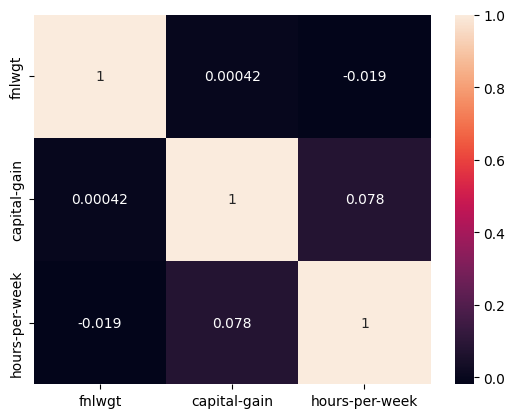

In [ ]:
corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True)

<ipython-input-36-a201f6dc8047>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matt=df.cov()


<Axes: >

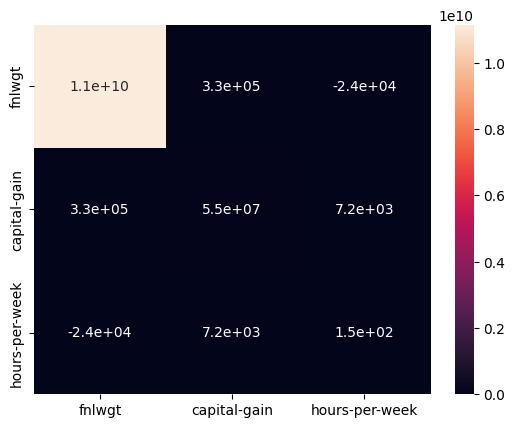

In [ ]:
cov_matt=df.cov()
sns.heatmap(cov_matt,annot=True)

In [ ]:
df.fillna(method='ffill', inplace=True)

<Figure size 1000x500 with 0 Axes>

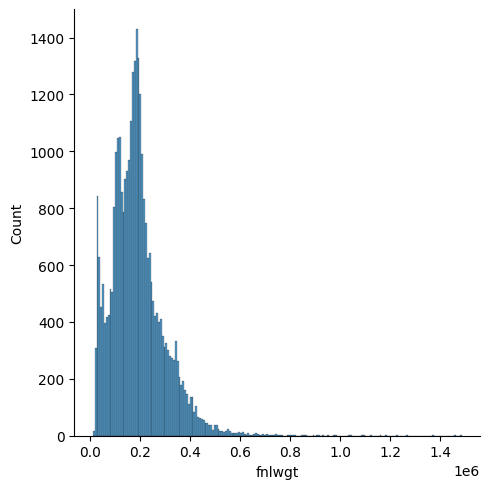

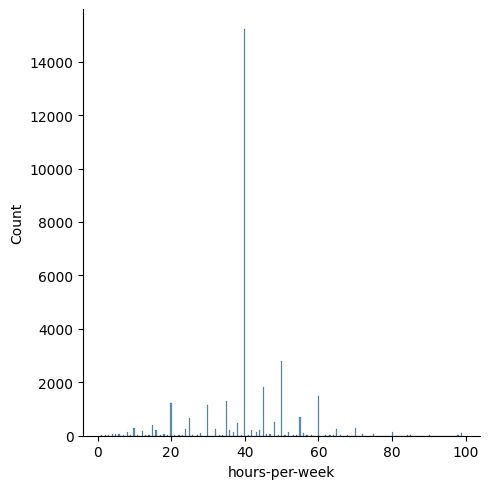

In [ ]:
plt.figure(figsize=(10,5))
sns.displot(df['fnlwgt'])
plt.show()
sns.displot(df['hours-per-week'])
plt.show()

In [ ]:
#Q1
male= df[df['sex'] == 'Male'].shape[0]
Female= df[df['sex'] == 'Female'].shape[0]
print("Num of Males: ",male)
print("Num of females: ",Female)

Num of Males:  21776
Num of females:  10766


In [ ]:
#Q2
df['age'] = pd.to_numeric(df["age"],errors='coerce')

In [ ]:

avg=df[df['sex'] == 'Female']['age'].mean()
print(float(avg))

147.83910822108686


In [ ]:
#Q3
US= df[df['native-country'] == 'United-States'].shape[0]
print(US)

29153


In [ ]:
#Q4
high_sal = df[df['salary'] == '>50K']['age'].agg(['mean', 'std'])
low_sal= df[df['salary'] == '<=50K']['age'].agg(['mean', 'std'])
print("More than 50k")
print(high_sal)
print("Less than 50k")
print(low_sal)

More than 50k
mean     104.021817
std     3740.712384
Name: age, dtype: float64
Less than 50k
mean     166.575783
std     5644.952463
Name: age, dtype: float64


In [ ]:
#Q5
high_salary_high_edu = df[(df['salary'] == '>50K') & (df['education'].isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']))].shape[0]
print(bool(high_salary_high_edu ))

True


In [ ]:
#Q6
age_stats = df.groupby(['race', 'sex'])['age'].describe()
amer_indian_eskimo_men = age_stats.loc['Amer-Indian-Eskimo', 'Male']['max']
print(age_stats)
print(amer_indian_eskimo_men )

                             count         mean          std     min     25%  \
race               sex                                                         
Amer-Indian-Eskimo Female    118.0    37.135593    13.169451    17.0    27.0   
                   Male      192.0    37.208333    12.049563    17.0    28.0   
Asian-Pac-Islander Female    345.0    35.121739    12.304150    17.0    25.0   
                   Male      693.0    38.958153    13.229400   -40.0    29.0   
Black              Cow         1.0    44.000000          NaN    44.0    44.0   
                   Female   1554.0    37.864865    12.632903    17.0    28.0   
                   Male     1566.0    37.682631    12.887998    17.0    27.0   
                   asd         1.0    20.000000          NaN    20.0    20.0   
Golden             Male        1.0    40.000000          NaN    40.0    40.0   
Male               White       1.0    31.000000          NaN    31.0    31.0   
Orange             Male        2.0    27

In [ ]:
#Q7
married = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
prop_married = (df[(df['marital-status'].isin(married)) & (df['sex'] == 'Male')]['salary'] == '>50K').mean()
print(prop_married)
prop_single = (df[(~df['marital-status'].isin(married)) & (df['sex'] == 'Male')]['salary'] == '>50K').mean()
print(prop_single)
print("After comparing, proportion of married men earn more than 50K")

0.44052017142012706
0.08456685270565396
After comparing, proportion of married men earn more than 50K


In [ ]:
max_hrs_per_week = df['hours-per-week'].max()
num_people_max_hours = df[df['hours-per-week'] == max_hrs_per_week].shape[0]
percentage_high_salary_max_hours = (df[(df['hours-per-week'] == max_hrs_per_week) & (df['salary'] == '>50K')].shape[0] / num_people_max_hours) * 100

print(f'Maximum hrs/ week: {max_hrs_per_week}')
print(f'Number of people: {num_people_max_hours}')
print(f'Percentage of people earning >50K among them: {percentage_high_salary_max_hours:.2f}%')


Maximum hrs/ week: 99
Number of people: 85
Percentage of people earning >50K among them: 29.41%


In [ ]:
#Q9
average_time = df.groupby(['salary', 'native-country'])['hours-per-week'].mean()
print(average_time)

salary  native-country 
<=50K   ?                  40.142202
        Cambodia           41.416667
        Canada             37.914634
        China              37.381818
        Columbia           38.684211
                             ...    
>50K    Trinadad&Tobago    40.000000
        United-States      45.505999
        Vietnam            39.200000
        Yugoslavia         49.500000
        asdf               40.000000
Name: hours-per-week, Length: 84, dtype: float64
